# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', delimiter ="\t")
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 3. Assign it to a variable called chipo.

In [7]:
chipo = df

### Step 4. See the first 10 entries

In [8]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 5. Create a histogram of the top 5 items bought

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Chicken Bowl'),
  Text(1, 0, 'Chicken Burrito'),
  Text(2, 0, 'Chips and Guacamole'),
  Text(3, 0, 'Steak Burrito'),
  Text(4, 0, 'Canned Soft Drink')])

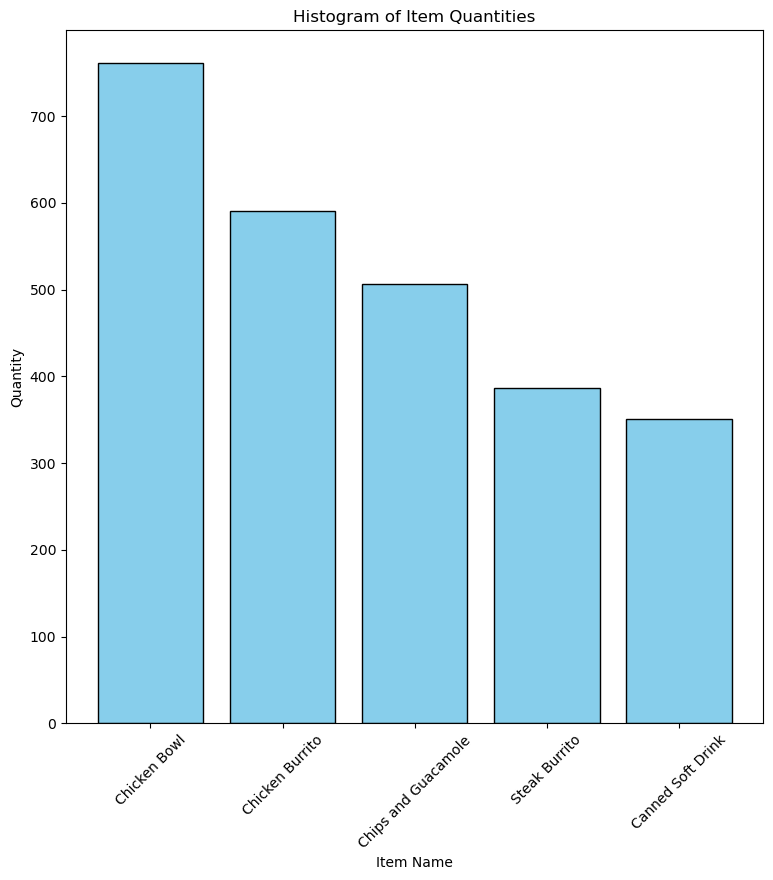

In [34]:
top5 = chipo[['item_name','quantity']].groupby('item_name').sum().sort_values('quantity',ascending = False).head(5).reset_index()

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

#plot
ax.bar(top5.item_name, top5.quantity, color='skyblue', edgecolor='black')
plt.xlabel("Item Name")
plt.ylabel("Quantity")
plt.title("Histogram of Item Quantities")
plt.xticks(rotation=45)

In [26]:
top5 = chipo[['item_name','quantity']].groupby('item_name').sum().sort_values('quantity',ascending = False).head(5)#.reset_index()
top5

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [ ]:
#run only once
converter = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(converter)

In [42]:

orders = chipo[['order_id','quantity','item_price']].groupby('order_id').sum().reset_index()

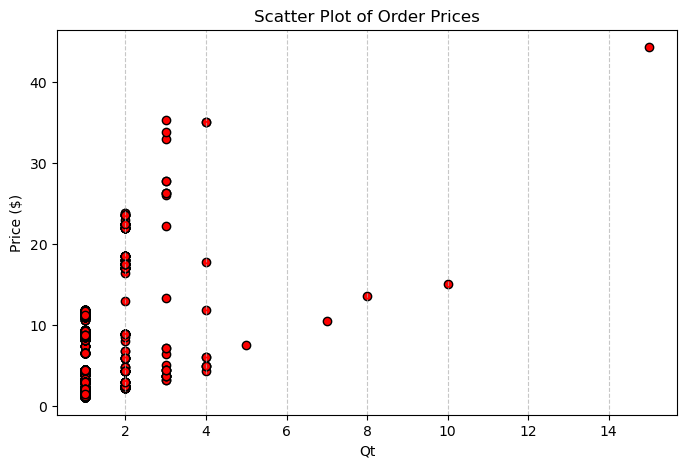

In [48]:
# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(chipo.quantity, chipo.item_price, color='red', marker='o', edgecolor='black')

# Formatting
plt.xlabel("Qt")
plt.ylabel("Price ($)")
plt.title("Scatter Plot of Order Prices")
plt.grid(axis='x', linestyle='--', alpha=0.7)

### Step 7. BONUS: Create a question and a graph to answer your own question.